# sentinelRequest

sentinelRequest can be used to colocate a geodataframe (ie areas, trajectories, buoys, etc ...) with sentinel (1, but also 2 , 3 : all known by scihub)

## Install
```
% pip install git+https://gitlab.ifremer.fr/sarwing/sentinelrequest.git
```

## CLI usage

In [1]:
!sentinelRequest --help

usage: sentinelRequest [-h] [--user USER] [--password PASSWORD] [--date DATE]
                       [--wkt WKT] [--filename FILENAME] [--query QUERY]
                       [--datatake] [--dateformat DATEFORMAT] [--dtime DTIME]
                       [--cachedir CACHEDIR]
                       [--cacherefreshrecent CACHEREFRESHRECENT] [--cols COLS]
                       [--outfile OUTFILE] [--outfile_format OUTFILE_FORMAT]
                       [--show]

Requests SAFE list from scihub

optional arguments:
  -h, --help            show this help message and exit
  --user USER           scihub login
  --password PASSWORD   scihub password
  --date DATE           date as string. if provided 2 time, first is start,
                        last is stop
  --wkt WKT             wkt representation of the region of interest
  --filename FILENAME   filename, with joker. ex 'S1?_?W_GRD*'. default to S1*
  --query QUERY         additionnal query. for exemple
                        'orbitdirect

```% sentinelRequest --user xxxx --password xxxxx --date='2018-09-23 00:00' --date='2018-09-23 12:00' --filename='S1?_?W_GRD*.SAFE' --cachedir=/home1/scratch/oarcher/scihub_cache/ --wkt='POLYGON ((-10 75, -10 86, 12 86, 12 84, -10 75))'
INFO:sentinelRequest:from 2018-09-23 00:00:00 to 2018-09-23 12:00:00 : 11 SAFES
INFO:sentinelRequest:Total : 11 SAFES
filename
S1B_EW_GRDM_1SDH_20180923T071854_20180923T071954_012839_017B47_17F2.SAFE
S1B_EW_GRDM_1SDH_20180923T071954_20180923T072054_012839_017B47_1E6F.SAFE
S1B_EW_GRDM_1SDH_20180923T072054_20180923T072154_012839_017B47_CD41.SAFE
S1B_EW_GRDM_1SDH_20180923T072154_20180923T072254_012839_017B47_3682.SAFE
S1A_EW_GRDM_1SDH_20180923T081003_20180923T081107_023823_02997B_049A.SAFE
S1A_EW_GRDM_1SDH_20180923T081107_20180923T081207_023823_02997B_6EA6.SAFE
S1B_EW_GRDM_1SDH_20180923T085656_20180923T085756_012840_017B4E_B07B.SAFE
S1B_EW_GRDM_1SDH_20180923T085756_20180923T085856_012840_017B4E_6CAD.SAFE
S1B_EW_GRDM_1SDH_20180923T085856_20180923T085956_012840_017B4E_1CCD.SAFE
S1B_EW_GRDM_1SDH_20180923T103504_20180923T103604_012841_017B54_DBBC.SAFE
S1B_EW_GRDM_1SDH_20180923T103604_20180923T103704_012841_017B54_B267.SAFE```

## API usage

In [2]:
%matplotlib inline
import geopandas as gpd
from sentinelRequest import scihubQuery
import datetime
import matplotlib.pyplot as plt
import shapely.wkt as wkt

# get your own credential from  https://scihub.copernicus.eu/dhus
import pickle
user,password = pickle.load(open("credential.pkl","rb"))

## user request as a geodataframe
As an example, tree area are defined:
* Ireland, that space overlap with Gascogne, but not overlap it in time.
* Gascogne and Portugal, that overlap in time and space

In [9]:
gdf = gpd.GeoDataFrame({
        "beginposition" : [ datetime.datetime(2018,10,2,0), datetime.datetime(2018,10,13,6) ,  datetime.datetime(2018,10,13,0) ],
        "endposition"   : [ datetime.datetime(2018,10,2,21) , datetime.datetime(2018,10,13,21) ,datetime.datetime(2018,10,13,18) ],
        "geometry"      : [ wkt.loads("POINT (-7 53)").buffer(4), wkt.loads("POINT (-5 45)").buffer(5),  wkt.loads("POLYGON ((-12 35, -5 35, -5 45, -12 45, -12 35))")]    
    },index=["Irland","Gascogne","Portugal"])
gdf

,beginposition,endposition,geometry
Irland,2018-10-02 00:00:00,2018-10-02 21:00:00,"POLYGON ((-3.00000 53.00000, -3.01926 52.60793..."
Gascogne,2018-10-13 06:00:00,2018-10-13 21:00:00,"POLYGON ((0.00000 45.00000, -0.02408 44.50991,..."
Portugal,2018-10-13 00:00:00,2018-10-13 18:00:00,"POLYGON ((-12.00000 35.00000, -5.00000 35.0000..."


In [4]:
help(scihubQuery)

Help on function scihubQuery in module sentinelRequest:

scihubQuery(gdf=None, startdate=None, stopdate=None, date=None, dtime=None, timedelta_slice=datetime.timedelta(days=7), filename='S1*', datatake=0, duplicate=False, query=None, user='guest', password='guest', min_sea_percent=None, fig=None, cachedir=None, cacherefreshrecent=datetime.timedelta(days=7))
    input:
        gdf : None geodataframe with geometry and date
        date: column name if gdf, or datetime object
        dtime : if date is not None, dtime as timedelta object will be used to compute startdate and stopdate 
        startdate : None or column  name in gdf , or datetime object . not used if date and dtime are defined
        stopdate : None or column  name in gdf , or datetime object . not used if date and dtime are defined
        duplicate : if True, will return duplicates safes (ie same safe with different prodid). Default to False
        datatake : number of adjacent safes to return (ie 0 will return 1 safe

INFO:sentinelRequest:from 2018-10-02 00:00:00 to 2018-10-02 21:00:00 : 9 SAFES
INFO:sentinelRequest:from 2018-10-13 00:00:00 to 2018-10-13 21:00:00 : 12 SAFES


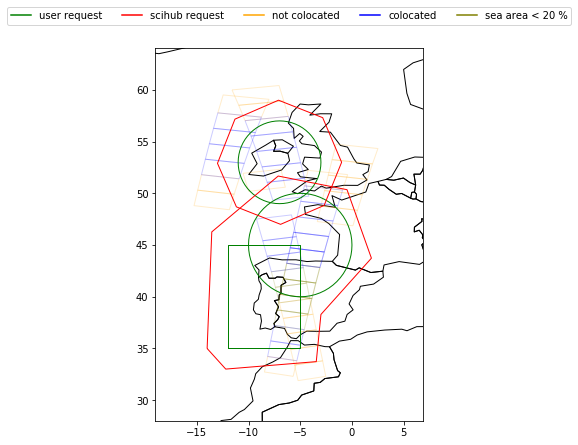

In [10]:
fig = plt.figure(figsize=(10,7))
safes = scihubQuery(
        gdf=gdf,
        min_sea_percent=20, 
        user=user,
        password=password,
        filename='S1?_?W_GRD*.SAFE',
        cachedir='/home1/scratch/oarcher/scihub_cache',
        fig=fig)


User requested area are in green. They can be more complex shape than allowed by scihub, because the shape is simplified for the request (in red ). Once the request is done, a colocation is done with the complex shape, to drop extraneaous safes (in yellow).

Gascogne and Portugal area are merged into a simplier big shape, because they are adjacent in time and space. Ireland is adjacent in space, but not in time.

Green safe are safe over land (min_sea_percent).


The result is a geodataframe with most information from scihub. Only colocated (ie blue) are returned:

In [6]:
safes.iloc[0]

acquisitiontype                                                      NOMINAL
beginposition                                     2018-10-02 07:02:07.487000
endposition                                       2018-10-02 07:02:32.486000
filename                   S1B_IW_GRDH_1SDV_20181002T070207_20181002T0702...
footprint                  POLYGON ((-9.331628 55.874199, -13.383495 56.2...
format                                                                  SAFE
gmlfootprint               <gml:Polygon srsName="http://www.opengis.net/g...
identifier                 S1B_IW_GRDH_1SDV_20181002T070207_20181002T0702...
ingestiondate                                     2018-10-02 11:01:50.187000
instrumentname                             Synthetic Aperture Radar (C-band)
instrumentshortname                                                SAR-C SAR
lastorbitnumber                                                        12970
lastrelativeorbitnumber                                                  169

Index from original request are preserved, so it's easy to know the area that belong to a safe

In [11]:
safes.loc['Portugal']

,acquisitiontype,beginposition,endposition,filename,footprint,format,gmlfootprint,identifier,ingestiondate,instrumentname,...,sensoroperationalmode,size,slicenumber,status,swathidentifier,url,url_alternative,url_icon,uuid,timeliness
Portugal,NOMINAL,2018-10-13 06:24:12.316,2018-10-13 06:24:37.314,S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,"POLYGON ((-2.674236 44.326656, -5.966702 44.73...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,2018-10-13 10:00:43.891,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,19,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,6244c5a5-cf83-4f27-90c4-e9b2e17c39dd,Fast-24h
Portugal,NOMINAL,2018-10-13 06:24:37.315,2018-10-13 06:25:02.315,S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,"POLYGON ((-3.10039 42.829861, -6.308844 43.238...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,2018-10-13 10:02:56.026,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,20,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,ea30fb07-13c8-49eb-b4c3-9f490b92fdef,Fast-24h
Portugal,NOMINAL,2018-10-13 06:26:42.317,2018-10-13 06:27:07.315,S1B_IW_GRDH_1SDV_20181013T062642_20181013T0627...,"POLYGON ((-4.976769 35.317348, -7.852863 35.73...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062642_20181013T0627...,2018-10-13 10:01:06.798,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,25,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,e4d9132d-8c1c-455a-ac23-51a4a86feb98,Fast-24h
Portugal,NOMINAL,2018-10-13 06:27:07.316,2018-10-13 06:27:32.314,S1B_IW_GRDH_1SDV_20181013T062707_20181013T0627...,"POLYGON ((-5.328031 33.812218, -8.151179000000...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062707_20181013T0627...,2018-10-13 10:00:43.992,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,26,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,f88bb340-28ab-4c7a-a806-bd797ea83145,Fast-24h


Some safes are in both area (Portugal and Gascogne), because they overlap in space and time.

In [12]:
safes[safes.duplicated(['filename'],keep=False)]

,acquisitiontype,beginposition,endposition,filename,footprint,format,gmlfootprint,identifier,ingestiondate,instrumentname,...,sensoroperationalmode,size,slicenumber,status,swathidentifier,url,url_alternative,url_icon,uuid,timeliness
Gascogne,NOMINAL,2018-10-13 06:24:12.316,2018-10-13 06:24:37.314,S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,"POLYGON ((-2.674236 44.326656, -5.966702 44.73...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,2018-10-13 10:00:43.891,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,19,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,6244c5a5-cf83-4f27-90c4-e9b2e17c39dd,Fast-24h
Portugal,NOMINAL,2018-10-13 06:24:12.316,2018-10-13 06:24:37.314,S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,"POLYGON ((-2.674236 44.326656, -5.966702 44.73...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,2018-10-13 10:00:43.891,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,19,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,6244c5a5-cf83-4f27-90c4-e9b2e17c39dd,Fast-24h
Gascogne,NOMINAL,2018-10-13 06:24:37.315,2018-10-13 06:25:02.315,S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,"POLYGON ((-3.10039 42.829861, -6.308844 43.238...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,2018-10-13 10:02:56.026,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,20,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,ea30fb07-13c8-49eb-b4c3-9f490b92fdef,Fast-24h
Portugal,NOMINAL,2018-10-13 06:24:37.315,2018-10-13 06:25:02.315,S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,"POLYGON ((-3.10039 42.829861, -6.308844 43.238...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,2018-10-13 10:02:56.026,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,20,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,ea30fb07-13c8-49eb-b4c3-9f490b92fdef,Fast-24h
